# KNN with Scikit-Learn

Dataset: Wine Dataset

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(score_func=f_classif, k='all')  # Change k to the number of features you want to select
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train model
knn  = KNeighborsClassifier(n_neighbors=3)
knn .fit(X_train_selected, y_train)
predictions = knn .predict(X_test_selected)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy}")


In [6]:
# Load another dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Change n_components to the number of components you want to keep
X_pca = pca.fit_transform(X)

# Split dataset into training and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train model
knn  = KNeighborsClassifier(n_neighbors=2)
knn .fit(X_train_pca, y_train)
predictions = knn .predict(X_test_pca)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9210526315789473


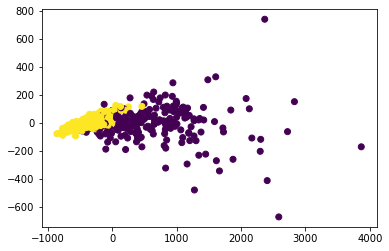

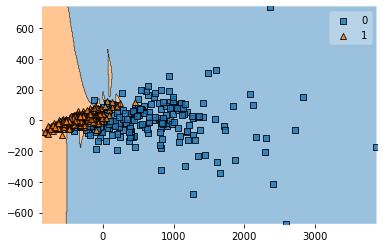

In [7]:
# Plot the data
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

# Plot the decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_pca, y, clf=knn)
plt.show()